## Libraries

In [1]:
# libraries to use
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import os
import cv2
import time
import random 
import copy
from PIL import Image
import itertools
from torchvision import models, transforms
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torch.optim import lr_scheduler
from sklearn.preprocessing import label_binarize
import sklearn.metrics
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, average_precision_score, balanced_accuracy_score, mean_squared_error, mean_absolute_error

## Data

In [2]:
# data path
root_dir = '...' ## TO UPDATE ACCORDINGLY
annot_dir = root_dir + 'FileList.csv'
tracings_dir = root_dir + 'VolumeTracings.csv'

# check if all good
df_annot = pd.read_csv(annot_dir)
print(df_annot)

df_tracings = pd.read_csv(tracings_dir)
print(df_tracings)

                 FileName         EF         ESV         EDV  FrameHeight  \
0      0X100009310A3BD7FC  78.498406   14.881368   69.210534          112   
1      0X1002E8FBACD08477  59.101988   40.383876   98.742884          112   
2      0X1005D03EED19C65B  62.363798   14.267784   37.909734          112   
3      0X10075961BC11C88E  54.545097   33.143084   72.914210          112   
4      0X10094BA0A028EAC3  24.887742  127.581945  169.855024          112   
...                   ...        ...         ...         ...          ...   
10025  0X234005774F4CB5CD  51.724743   47.065329   97.493690          768   
10026  0X2DC68261CBCC04AE  62.187781   26.333478   69.642772          768   
10027  0X35291BE9AB90FB89  62.070762   49.064338  129.357561          768   
10028  0X6C435C1B417FDE8A  59.635257   57.721170  142.998978          768   
10029  0X5515B0BD077BE68A  46.019994   27.260394   50.500910          768   

       FrameWidth  FPS  NumberOfFrames  Split  
0             112   50     

## Read video

In [3]:
def loadvideo(filename: str) -> np.ndarray:
    """Loads a video from a file.
    Args:
        filename (str): filename of video
    Returns:
        A np.ndarray with dimensions (channels=3, frames, height, width). The
        values will be uint8's ranging from 0 to 255.
    Raises:
        FileNotFoundError: Could not find `filename`
        ValueError: An error occurred while reading the video
    """

    if not os.path.exists(filename):
        raise FileNotFoundError(filename)
    capture = cv2.VideoCapture(filename)

    frame_count = int(capture.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_width = int(capture.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(capture.get(cv2.CAP_PROP_FRAME_HEIGHT))

    v = np.zeros((frame_count, frame_height, frame_width, 3), np.uint8)

    for count in range(frame_count):
        ret, frame = capture.read()
        if not ret:
            raise ValueError("Failed to load frame #{} of {}.".format(count, filename))

        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        v[count, :, :] = frame

    v = v.transpose((3, 0, 1, 2))
    
    capture.release()
    cv2.destroyAllWindows()

    return v   

## Plot some frames

0X101E654AF3FC07A8
13


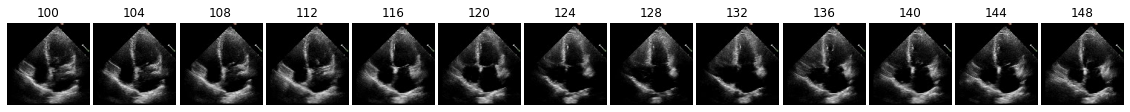

In [4]:
# video id
index = 15
id = df_annot['FileName'][index]
print(id)
curr_file = root_dir + 'Videos/' + id + '.avi'
frames = [100,150]
        
# load and pad video
pad = 6
video = loadvideo(curr_file)
c, l, h, w = video.shape
temp = np.zeros((c, l, h + 2 * pad, w + 2 * pad), dtype=video.dtype)
temp[:, :, pad:-pad, pad:-pad] = video  # pylint: disable=E1130
i, j = np.random.randint(0, 2 * pad, 2)
video = temp[:, :, i:(i + h), j:(j + w)]
print(len(range(frames[0],frames[1],4)))
        
# get the frame
fig = plt.figure(figsize=(20, 4))
cnt = 1
for i in range(frames[0],frames[1],4):
    tmp = video[:,i,:,:].transpose(1,2,0)
    plt.subplot(1, len(range(frames[0],frames[1],4)), cnt)
    plt.imshow(tmp)  
    plt.axis('off')
    plt.title(str(i))
    cnt = cnt + 1
    
plt.subplots_adjust(wspace=0.05, 
                    hspace=0.05)     

## If everything works well until this point, you are ready for the session! Looking forward!